[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Workshop-2024/blob/main/Day%209%3A%20Convolutional%20Neural%20Networks/Part2_Build_CNN_on_MNIST.ipynb)

# Part 2: Build a CNN on MNIST Dataset

In this notebook, we will build a **Convolutional Neural Network (CNN)** using **TensorFlow** and **Keras** to classify images from the **MNIST dataset** of handwritten digits (0-9). The goal is to create a model that can accurately predict the digit in each image.

---

### Step 1: Import Libraries and Load the MNIST Dataset

We will begin by importing the required libraries and loading the MNIST dataset.

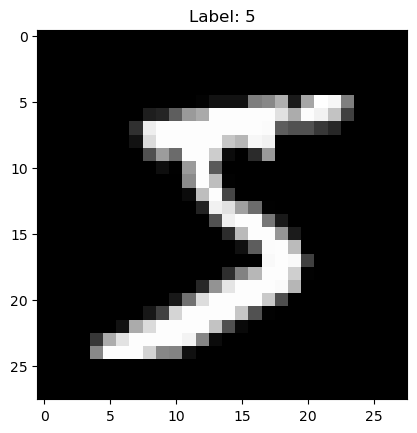

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the data to include a channel dimension (grayscale images have 1 channel)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Visualize the first image in the dataset
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

---

### Step 2: Build the CNN Model

We will now build a simple CNN with the following architecture:
- **2 Convolutional layers** followed by **MaxPooling** layers.
- A **Flattening layer** to convert the feature maps to a 1D vector.
- **Dense (Fully Connected) layers** for classification.

In [3]:
# Build the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps to feed into the dense layer
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

---

### Step 3: Compile the Model

Before training the model, we need to compile it by specifying:
- **Optimizer**: We will use the **Adam** optimizer.
- **Loss function**: Since this is a multi-class classification task, we use **sparse categorical crossentropy**.
- **Metrics**: We will track **accuracy** during training.

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---

### Step 4: Train the Model

We will train the model using the **60,000 training images** for 5 epochs and validate it on the **10,000 test images**.

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1377 - accuracy: 0.9581 - val_loss: 0.0558 - val_accuracy: 0.9823
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0466 - accuracy: 0.9852 - val_loss: 0.0370 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0361 - val_accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0286 - val_accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0345 - val_accuracy: 0.9893


---

### Step 5: Evaluate the Model

We will now evaluate the model on the test set to check its accuracy on unseen data.

In [7]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0345 - accuracy: 0.9893 - 1s/epoch - 4ms/step

Test accuracy: 0.989300012588501


---

### Step 6: Visualize the Training Progress

We will plot the training and validation accuracy and loss to see how well the model is learning over the epochs.

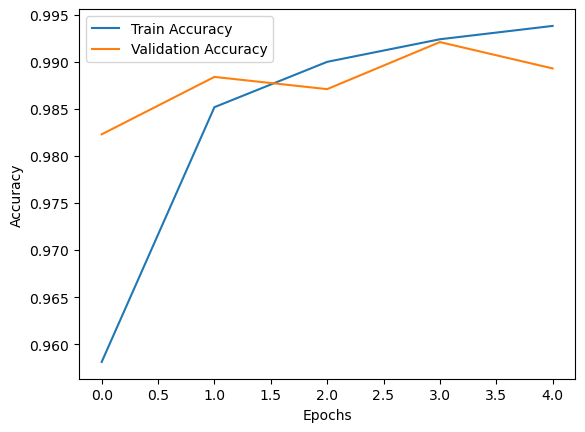

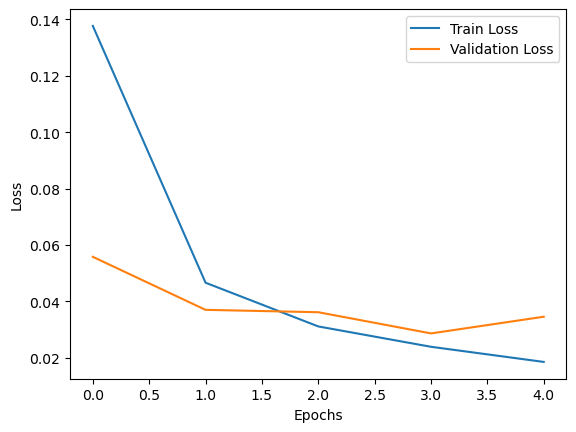

In [8]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

---

### Conclusion

In this notebook, we built and trained a **Convolutional Neural Network (CNN)** on the **MNIST dataset**. The model was able to classify handwritten digits with a high level of accuracy.

Next, you can experiment with more complex CNN architectures or use different datasets for image classification tasks.